****INITIALIZATION****

In [1]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten,  Conv2D, MaxPooling2D, BatchNormalization
# from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,regularizers
# from keras.models import load_model
# from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from keras import regularizers

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers



import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from IPython.display import clear_output

import time
import datetime

import shutil


**RESIZING TRAIN AND VALIDATION DATA**

In [5]:
print('number of train samples')
print(len(os.listdir(r'E:\Major Project\final model\datatree\datatree\train\nv')))
print(len(os.listdir(r'E:\Major Project\final model\datatree\datatree\train\mel')))
print(len(os.listdir(r'E:\Major Project\final model\datatree\datatree\train\bkl')))
print(len(os.listdir(r'E:\Major Project\final model\datatree\datatree\train\bcc')))
print(len(os.listdir(r'E:\Major Project\final model\datatree\datatree\train\akiec')))
print(len(os.listdir(r'E:\Major Project\final model\datatree\datatree\train\vasc')))
print(len(os.listdir(r'E:\Major Project\final model\datatree\datatree\train\df')))

number of train samples
4023
3895
3855
3610
3990
3490
2810


In [6]:

train_datagen = ImageDataGenerator(rescale=1./255)

x_train = train_datagen.flow_from_directory(
    directory=r'E:\Major Project\final model\datatree\datatree\train',
    batch_size=40,
    target_size=(75,100),
    class_mode="categorical",
    shuffle=True,
    seed=42
)

validation_datagen = ImageDataGenerator(rescale=1./255)

x_validation = validation_datagen.flow_from_directory(
    directory=r'E:\Major Project\final model\datatree\datatree\validation',
    batch_size=31,
    target_size=(75,100),
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1./255)

x_test = test_datagen.flow_from_directory(
    directory=r'E:\Major Project\final model\datatree\datatree\test',
    batch_size=20,
    target_size=(75,100),
    class_mode="categorical",
    shuffle=False,
    seed=42
)



Found 25673 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.


(75, 100, 3)


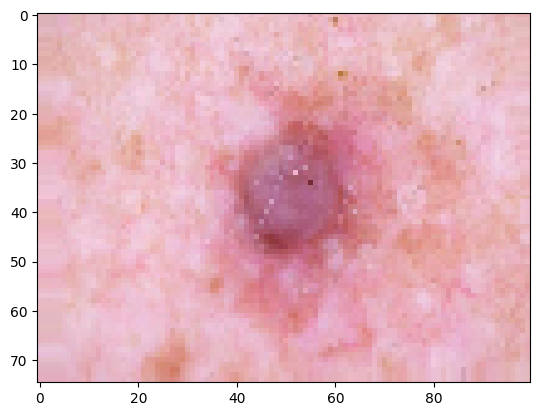

In [7]:
#ploting one image

p = x_train.next()
print((p[0][0]).shape)
(plt.imshow(p[0][0][:,:,:]) )




CODE FOR LIVE PLOTTING LOSS AND ACCURACY

In [9]:
import keras
import matplotlib.pyplot as plt
class PlotLearning(keras.callbacks.Callback):
    
    
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="train loss")
        ax1.plot(self.x, self.val_losses, label="val loss")
        ax1.legend()
        ax2.plot(self.x, self.acc, label="train acc")
        ax2.plot(self.x, self.val_acc, label="validation acc")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

**CNN**

Building the model

In [10]:
classes_count= 7

model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu',input_shape=(75,100,3)))

model.add(Conv2D(32,(3, 3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64,(3, 3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())


model.add(Dense(128, activation='relu'))
 
model.add(Dropout(0.1))

model.add(Dense(classes_count,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 96, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 35, 48, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 35, 48, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 46, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 23, 64)        0         
 g2D)                                                   

TRAINING THE MODEL

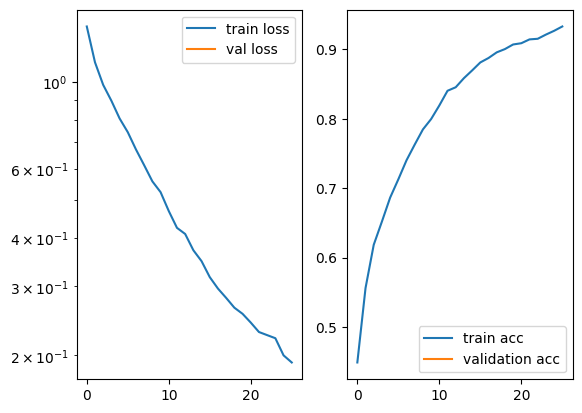

630/630 - 313s - loss: 0.1920 - accuracy: 0.9331 - 313s/epoch - 496ms/step
Training time: 2:09:53.745241


In [11]:

# start=time.time()

# cnn=model.fit_generator(x_train,steps_per_epoch=630,validation_data=x_validation,validation_steps=66,epochs=26,callbacks=[plot],verbose=2)  

# end=time.time()
# print('training time: '+str(datetime.timedelta(seconds=(end-start))))



start = time.time()

cnn = model.fit(
    x=x_train,
    steps_per_epoch=630,
    validation_data=x_validation,
    validation_steps=66,
    epochs=26,
    callbacks=[plot],
    verbose=2
)

end = time.time()
print('Training time:', str(datetime.timedelta(seconds=(end - start))))


In [98]:

print('train accuracy     : '+str(cnn.history['accuracy'][-1]))
print('train loss         : '+str(cnn.history['loss'][-1]))
print('validation accuracy: '+str(cnn.history['val_accuracy'][-1]))
print('validation loss    : '+str(cnn.history['val_loss'][-1]))


train accuracy     : 0.8951296210289001
train loss         : 0.28220540285110474
validation accuracy: 0.5720000267028809
validation loss    : 1.10210120677948


In [12]:
name='kaggle'+str(cnn.history['val_accuracy'][-1])
model.save(name+'.h5')


c:\Users\ASHVIN\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:

predictions=model.predict_generator(x_test,steps=100,verbose=1)
print(predictions.shape)



C:\Users\ASHVIN\AppData\Local\Temp\ipykernel_5888\3824094744.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(x_test,steps=100,verbose=1)


100/100 [==============================] - 9s 93ms/step
(2000, 7)


In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    


In [9]:
test_labels = x_test.classes
print(test_labels.shape)

NameError: name 'x_test' is not defined

Confusion matrix
[[  19   11   22    2    9    2    0]
 [  10   52   10    6    9   13    2]
 [  10   13  121    6   19   48    2]
 [   2    3    3    9    1    5    0]
 [  10    1   37    4   96   71    3]
 [   8   19   56   11   91 1155    1]
 [   0    3    0    0    1    0   24]]


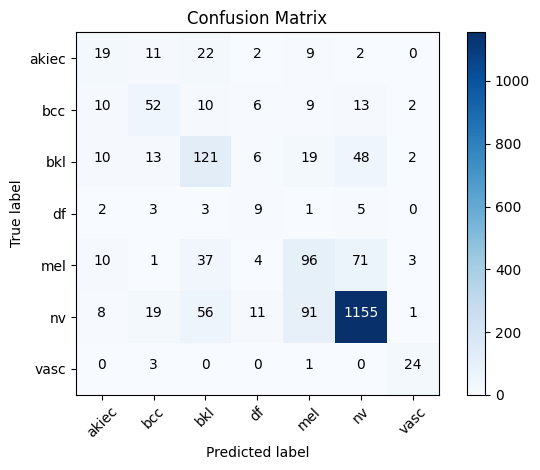

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import itertools


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')


In [114]:
from sklearn.metrics import classification_report

# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = x_test.classes


# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)



              precision    recall  f1-score   support

       akiec       0.34      0.38      0.36        65
         bcc       0.52      0.53      0.52       102
         bkl       0.49      0.53      0.51       219
          df       0.22      0.30      0.25        23
         mel       0.41      0.34      0.37       222
          nv       0.86      0.86      0.86      1341
        vasc       0.89      0.86      0.87        28

    accuracy                           0.73      2000
   macro avg       0.53      0.54      0.54      2000
weighted avg       0.73      0.73      0.73      2000



Text(0, 0.5, 'Fraction classified correctly')

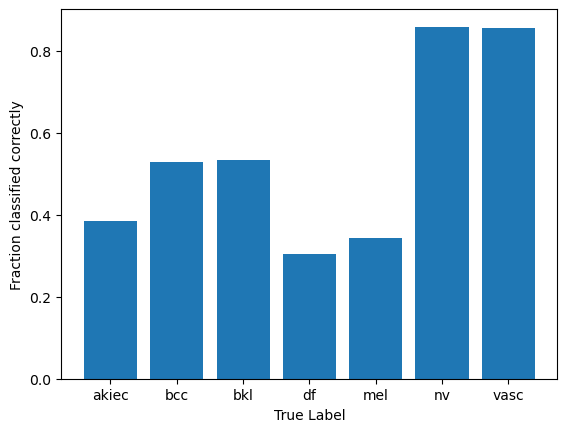

In [115]:
label_frac_correct=np.diag(cm)/np.sum(cm,axis=1)
plt.bar(cm_plot_labels,label_frac_correct)
plt.xlabel('True Label')
plt.ylabel('Fraction classified correctly')

**OVERFITTING**

The following methods can be used to prevent overfitting:
* Adding weights to classes
* Finetunning a deeper predifined model like Mobilenet